# MNIST

In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

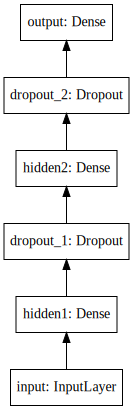

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
from conx import Dataset

In [10]:
dataset = Dataset.get_mnist()
dataset.slice(0, 100)
dataset.reshape_inputs(784)
dataset.shuffle()
dataset.summary()

Input Summary:
   count  : 100
   shape  : (784,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)


In [11]:
net.set_dataset(dataset)

In [12]:
widget = net.dashboard()

<IPython.core.display.Javascript object>

In [13]:
widget

In [14]:
net.train(100, verbose=0)
#net.test()

(100, 0.090803280472755432, 0.10999999940395355, 0.0)

In [15]:
%%time
for i in range(100):
    net.propagate(net.dataset.inputs[i])

CPU times: user 7.52 s, sys: 368 ms, total: 7.88 s
Wall time: 7.66 s


In [16]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

In [17]:
net = Network("MNIST-CNN")
net.add(Layer("input", (28,28,1), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPool2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPool2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten", visible=False))
net.add(Layer("hidden", 1000, activation='relu', vshape=(8,125), image_maxdim=500))
net.add(Layer("output", 10, activation='softmax'))

net.connect()

In [18]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [19]:
ds = Dataset.get_mnist()

In [20]:
ds.slice(100)

In [21]:
net.set_dataset(ds)

In [22]:
net.train()

Training...
Epoch 1/1
100/100 [==============================] - 0s - loss: 0.3255 - acc: 0.9000
Epoch #    1 | train error 0.32548 | train accuracy 0.90000 | validate% 0.00000


In [23]:
net.dashboard()

<IPython.core.display.Javascript object>

In [24]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [22]:
net.train(epochs=100, accuracy=.7)

Training...
Epoch #    2 | train error 0.29042 | train accuracy 0.90000 | validate% 0.00000
Epoch #    3 | train error 0.26413 | train accuracy 0.90000 | validate% 0.11000
Epoch #    4 | train error 0.21208 | train accuracy 0.91500 | validate% 0.05000
Epoch #    5 | train error 0.24686 | train accuracy 0.92300 | validate% 0.00000
Epoch #    6 | train error 0.18862 | train accuracy 0.93100 | validate% 0.20000
Epoch #    7 | train error 0.09313 | train accuracy 0.96600 | validate% 0.40000
Epoch #    8 | train error 0.07797 | train accuracy 0.97900 | validate% 0.41000
Epoch #    9 | train error 0.14988 | train accuracy 0.94000 | validate% 0.24000
Epoch #   10 | train error 0.11710 | train accuracy 0.98000 | validate% 0.47000
Epoch #   11 | train error 0.07682 | train accuracy 0.98300 | validate% 0.56000
Epoch #   12 | train error 0.04784 | train accuracy 0.98700 | validate% 0.67000
Epoch #   13 | train error 0.02696 | train accuracy 0.99500 | validate% 0.74000
Epoch #   13 | train error 0